Note: This is an implementation of logistic regression algorithm using Pytorch and using it to classify an image dataset. This logistic regression model distinguishs a UGA bulldog from a Georgetown hoya.


In [19]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torchvision
from torchvision import datasets
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader
from torchvision import transforms

%matplotlib inline

#Loading images in the train folder using ImageFolder and DataLoader classes.

In [20]:
transform = transforms.Compose([transforms.Resize((128,128)), transforms.ToTensor()])
dataset_train = datasets.ImageFolder('dawgs/train', transform  = transform)
train_loader = torch.utils.data.DataLoader(dataset_train, batch_size=32, shuffle = True)

x,y = next(iter(dataset_train))
print("dimensions of image: ", x.shape, "\n")
print(x)
print(y)
#plt.imshow(x[1])


dimensions of image:  torch.Size([3, 128, 128]) 

tensor([[[0.2510, 0.2431, 0.2471,  ..., 0.5843, 0.5725, 0.5686],
         [0.3216, 0.3176, 0.3176,  ..., 0.5804, 0.5647, 0.5647],
         [0.3843, 0.3804, 0.3843,  ..., 0.5765, 0.5608, 0.5608],
         ...,
         [0.3098, 0.3098, 0.3373,  ..., 0.4392, 0.4314, 0.3255],
         [0.2824, 0.2863, 0.2824,  ..., 0.5961, 0.5725, 0.4196],
         [0.2353, 0.2314, 0.2353,  ..., 0.3686, 0.3412, 0.2863]],

        [[0.1804, 0.1882, 0.1922,  ..., 0.4980, 0.4980, 0.4902],
         [0.2118, 0.2118, 0.2196,  ..., 0.5020, 0.4980, 0.4941],
         [0.2392, 0.2353, 0.2431,  ..., 0.5020, 0.4980, 0.4902],
         ...,
         [0.3216, 0.3255, 0.3569,  ..., 0.4627, 0.4627, 0.3647],
         [0.2941, 0.2980, 0.2980,  ..., 0.6196, 0.6039, 0.4549],
         [0.2471, 0.2471, 0.2588,  ..., 0.4000, 0.3804, 0.3294]],

        [[0.0510, 0.0588, 0.0627,  ..., 0.4275, 0.4549, 0.4471],
         [0.0549, 0.0549, 0.0627,  ..., 0.4431, 0.4588, 0.4471],
        

#defining model using Pytorch


In [21]:
from torch.nn import functional as F
class LogResNet(nn.Module):

    def __init__(self):
        super().__init__()
        self.layer = torch.nn.Linear(3*128*128,1, bias=False)
        self.layer1 = torch.nn.Linear(1, 3*128*128)
        
    def forward(self, x):
        x = x.reshape(-1, 49152)
        outputs = torch.sigmoid(self.layer(x))
        return outputs

model = LogResNet()
print(model)

LogResNet(
  (layer): Linear(in_features=49152, out_features=1, bias=False)
  (layer1): Linear(in_features=1, out_features=49152, bias=True)
)


#training neural network for 20 epochs.

In [22]:
from torch.autograd import Variable 
def train_model(model, epochs, learning_rate):
    '''
    Parameters:
    --------------------------
    model: an instance of your neural network
    epochs: int, number of epochs to train
    learning_rate: float, step size (or learning rate) for your optimizer    
    '''
    epochs = 20
    learning_rate = 0.0001
    criterion = torch.nn.BCELoss(reduction='mean')
    optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)

    iter = 0
    for epoch in range(int(epochs)):
        for i, (images, labels) in enumerate(train_loader):

            optimizer.zero_grad()
            outputs = model(images)
            labels = labels.unsqueeze(1)
            loss = criterion(outputs, labels.float())
            loss.backward()
            optimizer.step()
            #printing loss
        #print("epoch: ", epoch)
        #print("loss:", loss)

        correct = 0
        total = 0
        with torch.no_grad():
            for data in train_loader:
                images, labels = data
                outputs = model(images)
                _, predicted = torch.max(outputs.data, 1)
                total += labels.size(0)
                correct += (predicted.eq(labels.data)).sum().item()
            print("Epoch: ", epoch, "Loss: ", round(loss.item(), 4), "Accuracy: ", round(correct/total,4))

In [23]:
#Evaluating the performance of the trained model.
#Note the images show the labels and the estimated class probabilities

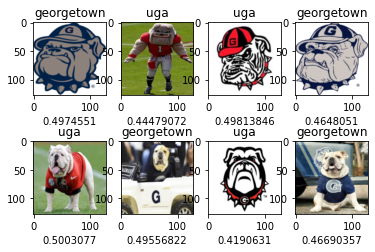

In [24]:
import math

transform = transforms.Compose([transforms.Resize((128,128)), transforms.ToTensor()])
dataset_test = datasets.ImageFolder('dawgs/test', transform  = transform)
test_loader = torch.utils.data.DataLoader(dataset_test, batch_size=8, shuffle = True)

fig, ax = plt.subplots(2,4)

batch = next(iter(test_loader))
images, labels = batch
outputs = model(images.view(-1,49152)).float()

for i in range(len(outputs)):
    ax[math.floor(i/4),i%4].imshow(np.transpose(images[i].numpy(), (1,2,0)))
    x = (outputs[i].detach().numpy()[0])
    ax[math.floor(i/4),i%4].set_xlabel(x)
    ax[math.floor(i/4),i%4].set_title(dataset_test.classes[labels[i].item()])
    
#print(outputs)

#print(labels)




In [25]:
#Finding the image training set that is closest to the decision boundary (0.5) and displaying it

image from dawgs/train folder NOT dawgs/test folder:
tensor([0.4985], grad_fn=<SelectBackward>)


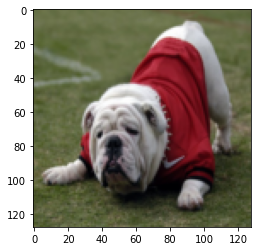

In [26]:
print("image from dawgs/train folder NOT dawgs/test folder:")
train = next(iter(train_loader))
image, label = train
output = model(image.view(-1,49152)).float()

value = 0.500000
idx1 = (abs(output.detach().numpy()-value)).argmin()
print(output[idx1])

for i in range(len(output)):
    x = (output[i].detach().numpy()[0])
    if plt.imshow(np.transpose(image[i].numpy(), (1,2,0))) == output[idx1]:
        plt.imshow(np.transpose(image[i].numpy(), (1,2,0)))
    

